# Student Performance Prediction Using Machine Learning

## Context
Academic performance is influenced by students’ study habits, lifestyle choices, and mental well-being.
This project builds a machine learning regression model to predict students’ exam scores using behavioral
and lifestyle data, and deploys the model as a real-time web application.


## Business Question
Can we accurately predict a student’s exam score using lifestyle and academic behavior indicators,
and identify which factors contribute most to academic success?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Dataset Overview
The dataset contains records of 1,000 students with variables covering study habits, digital behavior,
attendance, sleep, exercise, and mental health.
Target Variable: exam_score

In [2]:
stu_df = pd.read_csv('student_habits_performance.csv')

In [4]:
stu_df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
stu_df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [7]:
stu_df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [8]:
# Check for full detail across all the columns
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

## Data Quality Checks
Before modeling, data quality checks were performed to ensure:
- No missing values distort predictions
- No duplicate records bias the model
- Features are suitable for regression analysis

In [9]:
# Check for missing values across the columns
stu_df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [10]:
# Handling the missing values on the appropriate column
stu_df['parental_education_level'] = stu_df['parental_education_level'].fillna(stu_df['parental_education_level'].mode()[0])

In [11]:
# Handling duplicated values across all the columns
stu_df.duplicated().sum()

np.int64(0)

In [12]:
# Validating missing values
stu_df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

### Key EDA Insights
- Study hours show a strong positive relationship with exam score
- Excessive social media and Netflix usage negatively affect performance
- Mental health, sleep, and exercise improve academic outcomes

In [13]:
cat_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

In [14]:
for col in cat_cols:
    print(f'category count{col}: \n {stu_df[col].value_counts()}')

category countgender: 
 gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
category countpart_time_job: 
 part_time_job
No     785
Yes    215
Name: count, dtype: int64
category countdiet_quality: 
 diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
category countparental_education_level: 
 parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64
category countinternet_quality: 
 internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
category countextracurricular_participation: 
 extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


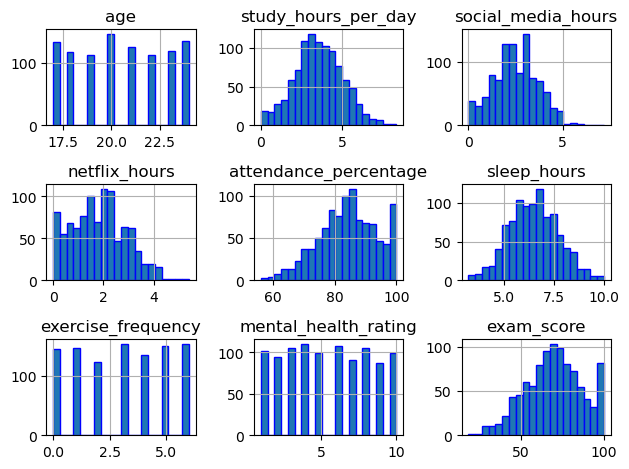

In [15]:
stu_df.hist(bins = 20, edgecolor = 'blue')
plt.tight_layout()
plt.show()

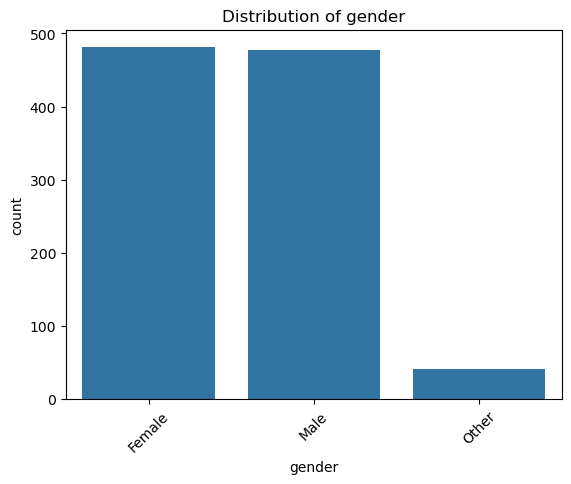

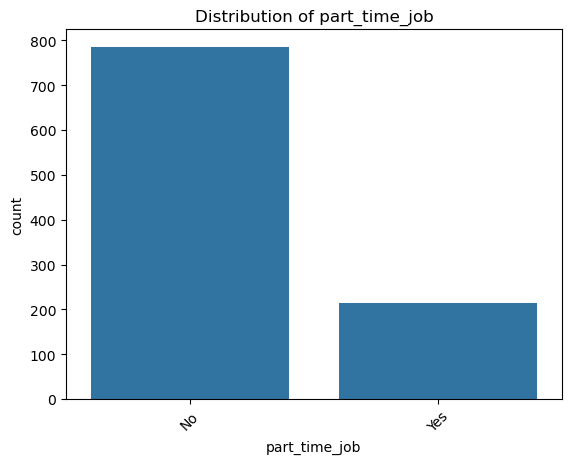

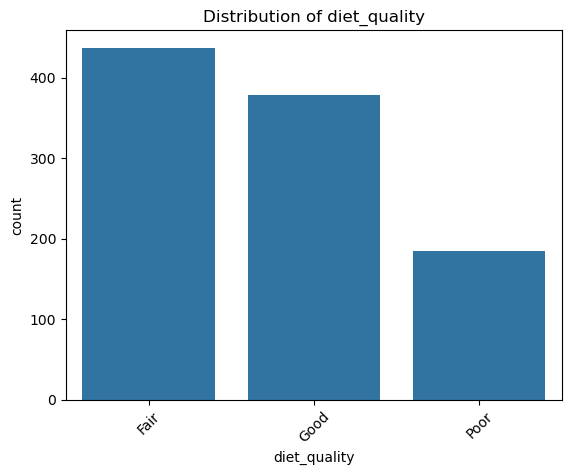

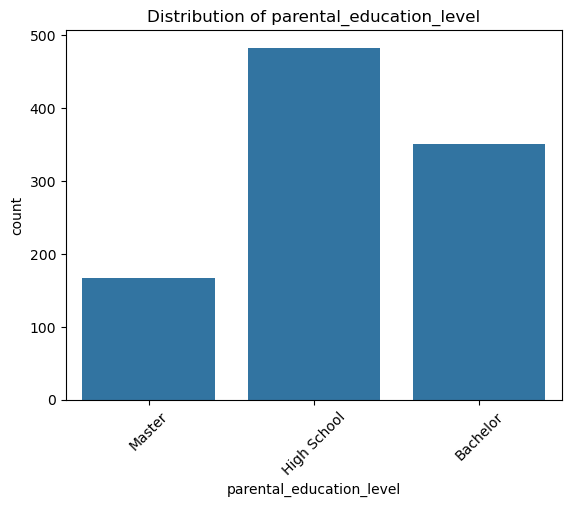

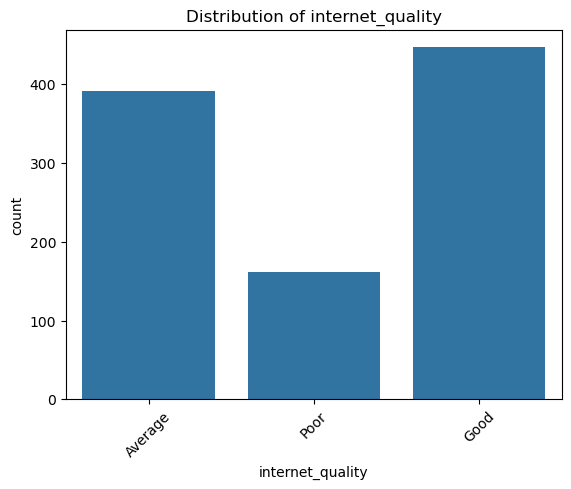

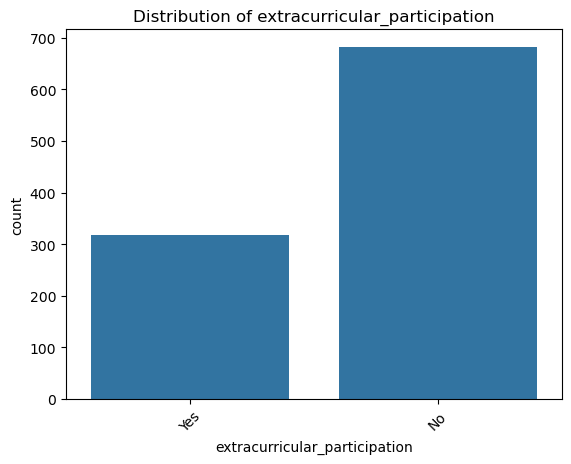

In [16]:
for col in cat_cols:
    sns.countplot(data = stu_df, x = col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation = 45)
    plt.show()

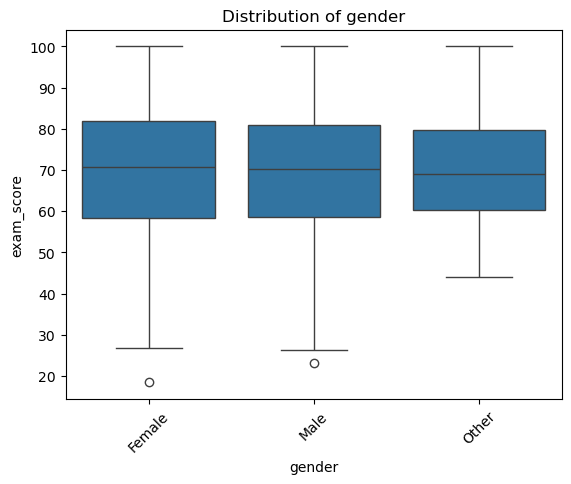

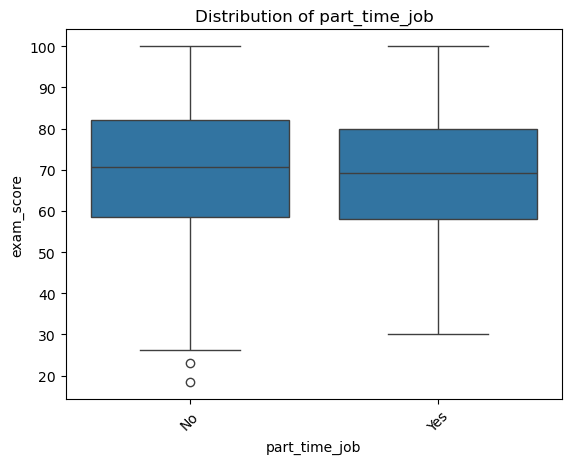

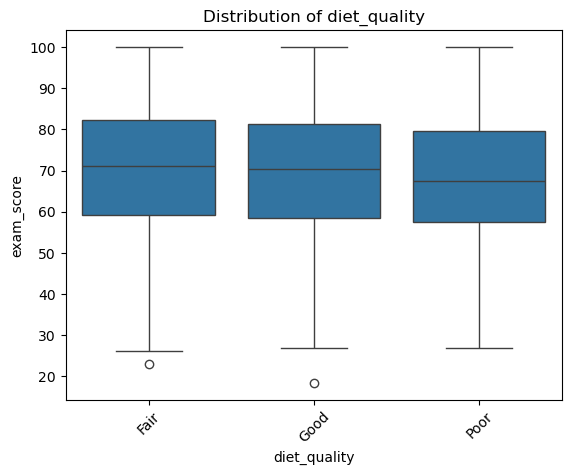

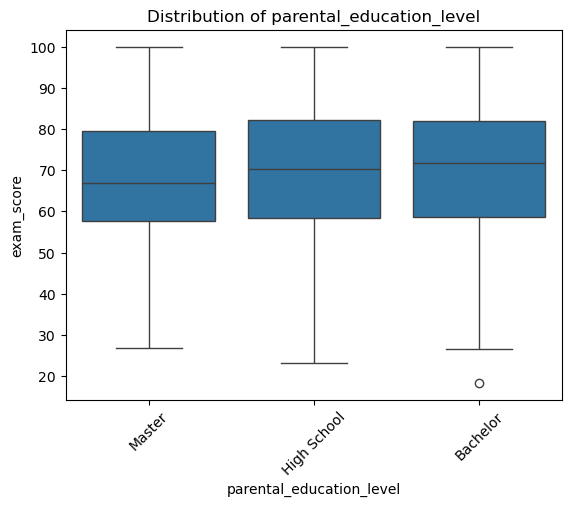

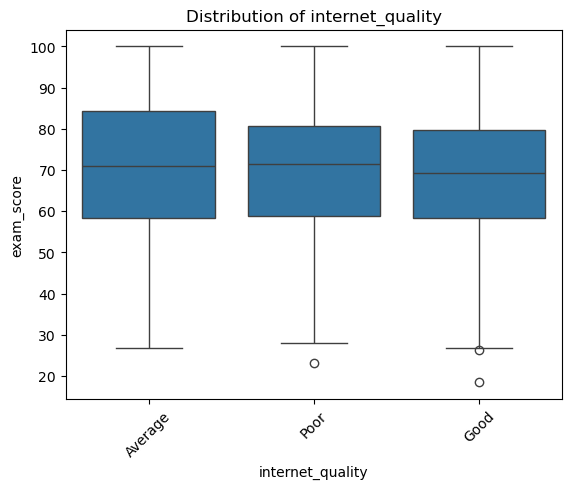

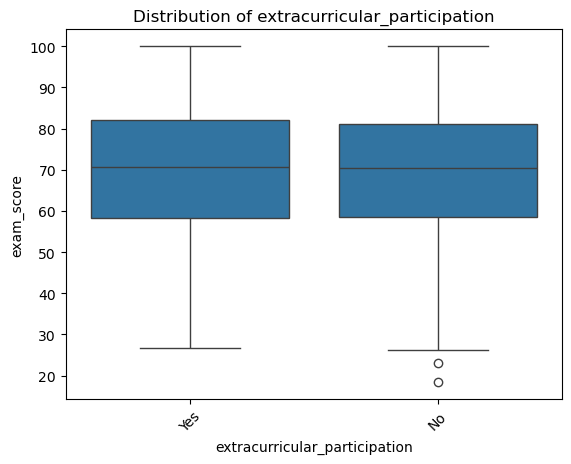

In [17]:
for col in cat_cols:
    sns.boxplot(data = stu_df, x = col, y = 'exam_score')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation = 45)
    plt.show()

## Feature Selection
Features were selected based on:
- Correlation with exam score
- Real-world relevance to student performance
- Interpretability for educational decision-making

In [18]:
num_df = stu_df.select_dtypes(include = 'number')

In [19]:
corr = num_df.corr().T
corr

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


<Axes: >

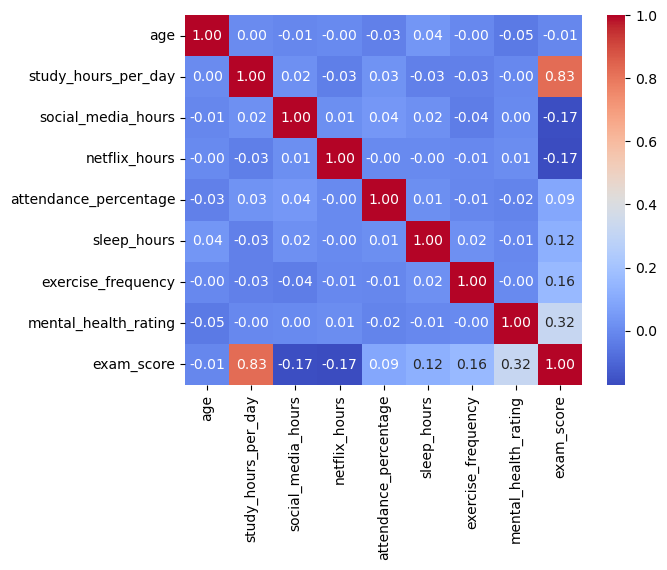

In [20]:
sns.heatmap(corr, annot =True, fmt = '.2f', cmap = 'coolwarm')

### Define Target Variable (y)

In [21]:
# Target variable (what we want to predict)
y = stu_df["exam_score"]


### Select Feature Variables (X)

In [22]:
# Feature variables (predictors)
X = stu_df[[ "study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating" ]]


In [23]:
y

0       56.2
1      100.0
2       34.3
3       26.8
4       66.4
       ...  
995     76.1
996     65.9
997     64.4
998     69.7
999     74.9
Name: exam_score, Length: 1000, dtype: float64

In [24]:
X

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
0,0.0,1.2,1.1,85.0,8.0,6,8
1,6.9,2.8,2.3,97.3,4.6,6,8
2,1.4,3.1,1.3,94.8,8.0,1,1
3,1.0,3.9,1.0,71.0,9.2,4,1
4,5.0,4.4,0.5,90.9,4.9,3,1
...,...,...,...,...,...,...,...
995,2.6,0.5,1.6,77.0,7.5,2,6
996,2.9,1.0,2.4,86.0,6.8,1,6
997,3.0,2.6,1.3,61.9,6.5,5,9
998,5.4,4.1,1.1,100.0,7.6,0,1


### Import necessary machine libraries from scikit learn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Divide dataset into Train–Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardized the training dataset

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train the Linear Regression Model

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([ 65.93174668,  74.46506842,  77.97964371,  74.18418969,
        61.23103323,  54.97742978,  75.88026042,  55.34679163,
        41.48945148,  73.00184277,  40.94791178, 102.54892539,
        57.84495409,  72.60084804,  35.54363191,  58.2334848 ,
        72.92120238,  69.07883092,  66.01604328,  50.64352598,
        55.46429974,  62.3995392 ,  50.2440905 ,  88.17958281,
        70.25673595,  71.42293921,  68.7452301 ,  57.22491527,
        69.69515709,  68.05551336,  65.46040341,  79.33693829,
        64.93124019,  81.33900039,  60.23286135,  50.93152731,
        71.06190778,  58.5922925 ,  64.908944  ,  98.26625305,
        50.50910685,  86.06835824,  67.96973081,  63.5940537 ,
        93.71924109,  82.76425566,  52.78265316,  78.80027588,
        64.01230469,  65.47338349,  66.82122651,  47.14053474,
        70.63924796,  77.17395129,  44.04281738,  75.97976176,
        73.34238635,  69.03203137,  65.01157867,  48.87318859,
        85.920377  ,  74.93577181,  75.7565204 ,  47.41

### Model Evaluation

In [31]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8995801560882966
Mean Squared Error: 25.750569794739203
Root Mean Squared Error (RMSE): 5.074501925779436


### View Feature Importance (Regression Coefficients)

In [32]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})

print(coefficients.sort_values(by="Coefficient", ascending=False))

                 Feature  Coefficient
0    study_hours_per_day     9.535970
4            sleep_hours     1.992217
6   mental_health_rating     1.949278
5     exercise_frequency     1.315295
3  attendance_percentage     0.145650
2          netflix_hours    -2.318499
1     social_media_hours    -2.703236


In [33]:
import statsmodels.api as sm

In [35]:
X = sm.add_constant(X)

In [36]:
model = sm.OLS(y, X).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1291.
Date:                Fri, 26 Dec 2025   Prob (F-statistic):               0.00
Time:                        17:44:11   Log-Likelihood:                -3088.4
No. Observations:                1000   AIC:                             6193.
Df Residuals:                     992   BIC:                             6232.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.15

### Actual vs Predicted Visualization

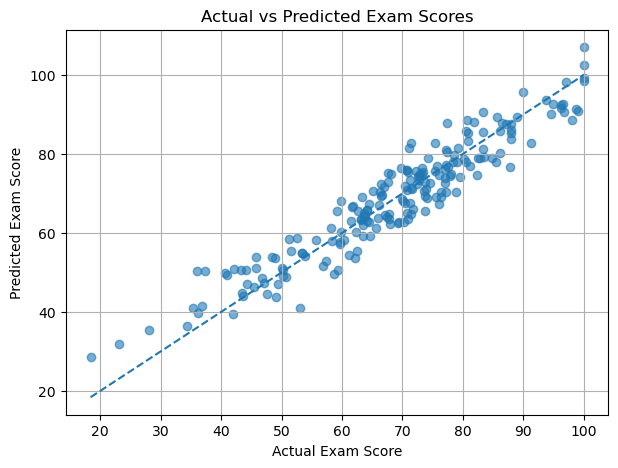

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.grid(True)
plt.show()

## Model Performance Interpretation
The model explains approximately 90% of the variance in exam scores, with predictions typically within
±5 marks. This level of accuracy makes the model suitable for early academic intervention use cases.

In [ ]:
!python -m streamlit run exam_score_app.py